# 子内容一：用numpy实现两层神经网络
--------------

一个全连接ReLU神经网络，一个隐藏层，没有bias。用来从x预测y，使用L2 Loss。
- $h = W_1X$
- $a = max(0, h)$
- $y_{hat} = W_2a$

这一实现完全使用numpy来计算前向神经网络，loss，和反向传播。
- forward pass
- loss
- backward pass

numpy ndarray是一个普通的n维array。它不知道任何关于深度学习或者梯度(gradient)的知识，也不知道计算图(computation graph)，只是一种用来计算数学运算的数据结构。
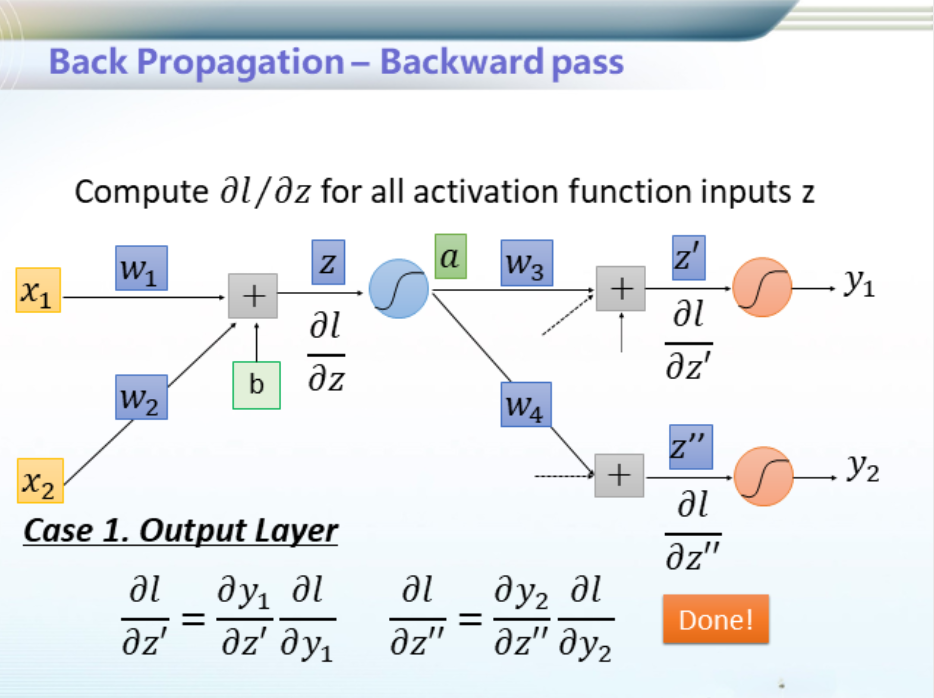


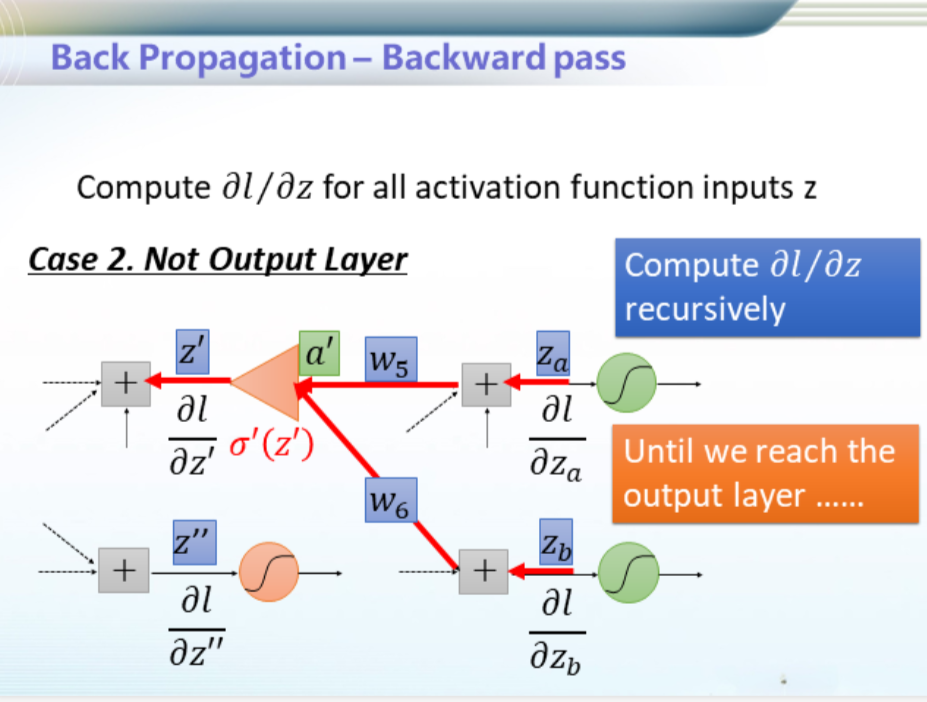

In [1]:
import numpy as np
N, D_in, H, D_out = 64, 1000, 100, 10
#N batchsize;
#D_in inputsize;
#H hiddensize
#D_in outputsize

# 随机创建一些训练数据
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for it in range(500):
    # Forward pass
    h = x.dot(w1) # N * H   
    h_relu = np.maximum(h, 0) # N * H maximum数组元素的逐元素最大值。
    y_pred = h_relu.dot(w2) # N * D_out
    
    # compute loss
    loss = np.square(y_pred - y).sum()
    print(it, "loss的值为：{}".format(loss))
    
    # Backward pass
    # compute the gradient
    grad_y_pred = 2.0 * (y_pred - y)#loss对预测的y求梯度
    grad_w2 = h_relu.T.dot(grad_y_pred)#技巧：输入乘以对y求得梯度
    #（用forawrdpassloss*backwardpassloss)--前者z对w2求导【其实就是输入值h_relu】，后者就是loss对z求导，z是未进激活函数的input）
    grad_h_relu = grad_y_pred.dot(w2.T)
    #
    grad_h = grad_h_relu.copy()
    grad_h[h<0] = 0
    grad_w1 = x.T.dot(grad_h)
    
    # update weights of w1 and w2
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 loss的值为：28379403.592033047
1 loss的值为：22872384.840349678
2 loss的值为：20768799.238075428
3 loss的值为：19119985.40269065
4 loss的值为：16640879.854175135
5 loss的值为：13269720.50559283
6 loss的值为：9680427.177786157
7 loss的值为：6611223.5446752645
8 loss的值为：4374733.53911453
9 loss的值为：2898015.1772827175
10 loss的值为：1973791.5309259717
11 loss的值为：1400922.2017945042
12 loss的值为：1040327.1136629349
13 loss的值为：805416.0783572692
14 loss的值为：645621.4243034995
15 loss的值为：531803.9153673616
16 loss的值为：447138.00911595183
17 loss的值为：381805.4486176754
18 loss的值为：329853.299711851
19 loss的值为：287587.1774069761
20 loss的值为：252512.78447987261
21 loss的值为：222971.0333812352
22 loss的值为：197806.72752876804
23 loss的值为：176167.49064570278
24 loss的值为：157443.78182233532
25 loss的值为：141136.63139286393
26 loss的值为：126855.06738935877
27 loss的值为：114300.5191781691
28 loss的值为：103225.66371504277
29 loss的值为：93418.77484257086
30 loss的值为：84716.93436927492
31 loss的值为：76972.7897577291
32 loss的值为：70047.11969621152
33 loss的值为：63841.563512672896
34 loss的值

279 loss的值为：0.08375175695851271
280 loss的值为：0.07996189067284268
281 loss的值为：0.0763431663173038
282 loss的值为：0.07289112892397756
283 loss的值为：0.069595771749386
284 loss的值为：0.06645116174205996
285 loss的值为：0.06345028553139459
286 loss的值为：0.06058515072252463
287 loss的值为：0.05785133447487181
288 loss的值为：0.055241401160160714
289 loss的值为：0.05275094163646571
290 loss的值为：0.050373074542673923
291 loss的值为：0.048103682661273406
292 loss的值为：0.045937481493836585
293 loss的值为：0.04386960575908257
294 loss的值为：0.04189582855907339
295 loss的值为：0.04001094829911621
296 loss的值为：0.038212790550200854
297 loss的值为：0.03649489799542671
298 loss的值为：0.034855707237253536
299 loss的值为：0.03329042961800941
300 loss的值为：0.031796386482049924
301 loss的值为：0.030369707854473793
302 loss的值为：0.029007435655395097
303 loss的值为：0.027707098809815114
304 loss的值为：0.0264652202394851
305 loss的值为：0.025279788703146816
306 loss的值为：0.024147554602524178
307 loss的值为：0.023067013721439048
308 loss的值为：0.022034423530815868
309 loss的值为：0.0210490454841744

# 子内容二：用pytorch实现两层神经网络
--------------
一个PyTorch Tensor很像一个numpy的ndarray。但是它和numpy ndarray最大的区别是，PyTorch Tensor可以在CPU或者GPU上运算。如果想要在GPU上运算，就需要把Tensor换成cuda类型。

PyTorch: Tensor和autograd
-------------------------------

PyTorch的一个重要功能就是autograd，也就是说只要定义了forward pass(前向神经网络)，计算了loss之后，PyTorch可以自动求导计算模型所有参数的梯度。

一个PyTorch的Tensor表示计算图中的一个节点。如果``x``是一个Tensor并且``x.requires_grad=True``那么``x.grad``是另一个储存着``x``当前梯度(相对于一个scalar，常常是loss)的向量。


In [3]:
import torch
N, D_in, H, D_out = 64, 1000, 100, 10

# 随机创建一些训练数据
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

w1 = torch.randn(D_in, H, requires_grad=True)
w2 = torch.randn(H, D_out, requires_grad=True)

learning_rate = 1e-6
for it in range(500):
    # Forward pass
    y_pred = x.mm(w1).clamp(min=0).mm(w2)
    
    # compute loss
    loss = (y_pred - y).pow(2).sum() # computation graph
    print(it, loss.item())
    
    # Backward pass
    loss.backward()
    
    # update weights of w1 and w2
    with torch.no_grad():#没有的话，只能输出一个loss,无法进行下面的权重操作
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()#后面加下划线就是in-place操作
        w2.grad.zero_()

0 33303018.0
1 27792298.0
2 24352280.0
3 20198040.0
4 15125008.0
5 10233542.0
6 6517561.5
7 4093550.0
8 2650024.75
9 1808416.75
10 1310040.25
11 999902.625
12 794971.75
13 650721.1875
14 543798.625
15 461072.65625
16 395072.09375
17 341259.9375
18 296591.6875
19 259040.796875
20 227221.203125
21 200099.09375
22 176826.75
23 156772.4375
24 139363.609375
25 124209.953125
26 110980.390625
27 99375.8671875
28 89173.875
29 80172.5703125
30 72226.6796875
31 65185.64453125
32 58923.7265625
33 53343.93359375
34 48359.36328125
35 43899.47265625
36 39901.80859375
37 36315.1171875
38 33091.0546875
39 30188.548828125
40 27568.50390625
41 25202.51171875
42 23061.828125
43 21122.32421875
44 19363.107421875
45 17765.841796875
46 16313.568359375
47 14991.5
48 13787.37890625
49 12689.0048828125
50 11686.5673828125
51 10770.80859375
52 9932.9560546875
53 9166.7490234375
54 8464.8544921875
55 7821.3515625
56 7231.400390625
57 6690.21435546875
58 6193.54541015625
59 5736.330078125
60 5315.39794921875
61 4

423 8.780217467574403e-05
424 8.608678035670891e-05
425 8.457068906864151e-05
426 8.272302511613816e-05
427 8.106636232696474e-05
428 7.967569399625063e-05
429 7.824626663932577e-05
430 7.661196286790073e-05
431 7.510599971283227e-05
432 7.398897287202999e-05
433 7.284519961103797e-05
434 7.141198148019612e-05
435 7.044306403258815e-05
436 6.924393528606743e-05
437 6.762638804502785e-05
438 6.658102938672528e-05
439 6.540207687066868e-05
440 6.439552089432254e-05
441 6.330534961307421e-05
442 6.209199636941776e-05
443 6.1005892348475754e-05
444 6.003265662002377e-05
445 5.9145313571207225e-05
446 5.804077227367088e-05
447 5.708148091798648e-05
448 5.604309990303591e-05
449 5.5251573940040544e-05
450 5.425646304502152e-05
451 5.345235695131123e-05
452 5.250338290352374e-05
453 5.2134328143438324e-05
454 5.115408930578269e-05
455 5.044674617238343e-05
456 4.9558322643861175e-05
457 4.888735566055402e-05
458 4.824290226679295e-05
459 4.753667599288747e-05
460 4.675304444390349e-05
461 4.6

In [4]:
#查看torch.no_grad的作用
torch.no_grad?
#禁用梯度计算对于推断非常有用。它将减少计算的内存消耗

#### 用pytorch实现两层神经网络

In [6]:
import torch
N, D_in, H, D_out = 64, 1000, 100, 10

# 随机创建一些训练数据
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

w1 = torch.randn(D_in, H)
w2 = torch.randn(H, D_out)

learning_rate = 1e-6
for it in range(500):
    # Forward pass
    h = x.mm(w1) # N * H
    h_relu = h.clamp(min=0) # N * H
    y_pred = h_relu.mm(w2) # N * D_out
    
    # compute loss
    loss = (y_pred - y).pow(2).sum().item()
    print(it, "loss的值为：{}".format(loss))
    
    # Backward pass
    # compute the gradient
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h<0] = 0
    grad_w1 = x.t().mm(grad_h)
    
    # update weights of w1 and w2
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 loss的值为：39397980.0
1 loss的值为：38078632.0
2 loss的值为：37970884.0
3 loss的值为：32894094.0
4 loss的值为：22843040.0
5 loss的值为：12878936.0
6 loss的值为：6564781.5
7 loss的值为：3483047.0
8 loss的值为：2108429.5
9 loss的值为：1464747.5
10 loss的值为：1120262.75
11 loss的值为：905076.3125
12 loss的值为：753415.375
13 loss的值为：637742.8125
14 loss的值为：545295.8125
15 loss的值为：469581.84375
16 loss的值为：406777.84375
17 loss的值为：354062.375
18 loss的值为：309480.53125
19 loss的值为：271517.03125
20 loss的值为：239018.71875
21 loss的值为：211072.265625
22 loss的值为：186954.921875
23 loss的值为：166052.65625
24 loss的值为：147855.90625
25 loss的值为：131964.765625
26 loss的值为：118045.1015625
27 loss的值为：105806.828125
28 loss的值为：95020.7109375
29 loss的值为：85485.3125
30 loss的值为：77060.90625
31 loss的值为：69589.828125
32 loss的值为：62944.02734375
33 loss的值为：57015.8828125
34 loss的值为：51735.96484375
35 loss的值为：47006.19140625
36 loss的值为：42764.58203125
37 loss的值为：38958.0703125
38 loss的值为：35531.109375
39 loss的值为：32442.5234375
40 loss的值为：29652.654296875
41 loss的值为：27129.935546875
42 loss的值为：248

374 loss的值为：0.0008333565783686936
375 loss的值为：0.0008052867488004267
376 loss的值为：0.0007792477845214307
377 loss的值为：0.0007553006871603429
378 loss的值为：0.000730885483790189
379 loss的值为：0.0007069011917337775
380 loss的值为：0.0006853993982076645
381 loss的值为：0.0006631130818277597
382 loss的值为：0.0006415516254492104
383 loss的值为：0.0006234542233869433
384 loss的值为：0.0006043238681741059
385 loss的值为：0.0005853655165992677
386 loss的值为：0.0005677300505340099
387 loss的值为：0.0005516383098438382
388 loss的值为：0.0005347855621948838
389 loss的值为：0.0005192136741243303
390 loss的值为：0.0005033971974626184
391 loss的值为：0.0004880217311438173
392 loss的值为：0.0004739620489999652
393 loss的值为：0.00046020885929465294
394 loss的值为：0.000447316822828725
395 loss的值为：0.000434147339547053
396 loss的值为：0.0004224102303851396
397 loss的值为：0.0004103223909623921
398 loss的值为：0.00039870638283900917
399 loss的值为：0.00038784852949902415
400 loss的值为：0.0003774035139940679
401 loss的值为：0.0003676241321954876
402 loss的值为：0.00035726770875044167
403 loss的值为：0

# 子内容三：利用Pytorch的nn库来构建网络
-----------


这次我们使用PyTorch中nn这个库来构建网络。
用PyTorch autograd来构建计算图和计算gradients，
然后PyTorch会帮我们自动计算gradient。

In [5]:
import torch.nn as nn

N, D_in, H, D_out = 64, 1000, 100, 10

# 随机创建一些训练数据
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H, bias=False), # w_1 * x + b_1
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out, bias=False),
)

torch.nn.init.normal_(model[0].weight)
torch.nn.init.normal_(model[2].weight)

# model = model.cuda()

loss_fn = nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for it in range(500):
    # Forward pass
    y_pred = model(x) # model.forward() 
    
    # compute loss
    loss = loss_fn(y_pred, y) # computation graph
    print(it, loss.item())
    
    # Backward pass
    loss.backward()
    
    # update weights of w1 and w2
    with torch.no_grad():
        for param in model.parameters(): # param (tensor, grad)
            param -= learning_rate * param.grad
            
    model.zero_grad()

0 31826308.0
1 26329580.0
2 25488024.0
3 24886156.0
4 22149604.0
5 17137344.0
6 11500434.0
7 6975920.0
8 4080689.5
9 2448467.75
10 1571020.25
11 1093960.375
12 820079.4375
13 649843.25
14 534471.75
15 450254.28125
16 385204.21875
17 332916.1875
18 289934.46875
19 253937.5625
20 223379.0
21 197247.796875
22 174779.5625
23 155317.0
24 138374.171875
25 123575.859375
26 110597.59375
27 99181.1796875
28 89106.984375
29 80228.875
30 72364.828125
31 65381.28125
32 59169.0390625
33 53621.9375
34 48672.640625
35 44233.9609375
36 40246.234375
37 36659.59765625
38 33430.296875
39 30513.376953125
40 27879.8515625
41 25499.466796875
42 23349.52734375
43 21399.30078125
44 19633.564453125
45 18032.43359375
46 16574.56640625
47 15245.216796875
48 14033.25390625
49 12927.197265625
50 11916.84765625
51 10992.30859375
52 10146.2470703125
53 9371.1611328125
54 8660.2822265625
55 8007.89892578125
56 7408.60791015625
57 6857.830078125
58 6351.7314453125
59 5885.36376953125
60 5455.875
61 5060.37890625
62 46

419 0.0002079965779557824
420 0.00020328637037891895
421 0.00019772238738369197
422 0.00019315414829179645
423 0.00018913942039944232
424 0.00018438058032188565
425 0.0001806995423976332
426 0.00017604345339350402
427 0.00017250793462153524
428 0.0001683451555436477
429 0.00016470241826027632
430 0.00016109389252960682
431 0.00015735744091216475
432 0.00015387161693070084
433 0.00015083108155522496
434 0.0001475111930631101
435 0.00014487627777270973
436 0.00014189688954502344
437 0.0001386303483741358
438 0.00013595019117929041
439 0.000133093650219962
440 0.00013003703497815877
441 0.00012772179616149515
442 0.00012484040053095669
443 0.00012227401020936668
444 0.00012016529944958165
445 0.00011752668069675565
446 0.00011516848462633789
447 0.00011297122546238825
448 0.00011084319703513756
449 0.00010865787044167519
450 0.00010648848547134548
451 0.00010466163803357631
452 0.000102607264125254
453 0.00010034654405899346
454 9.869541099760681e-05
455 9.685677650850266e-05
456 9.480609

In [6]:
model[0].weight

Parameter containing:
tensor([[-0.4709, -0.1361, -1.6834,  ..., -0.9291, -0.6067, -0.2123],
        [-0.4257,  0.5476,  0.9004,  ..., -0.5257, -1.4994, -0.6475],
        [-0.1632, -1.0687,  0.6006,  ..., -0.2175, -0.3909, -0.1756],
        ...,
        [ 1.9036, -0.3290, -0.7197,  ..., -1.5994, -0.2458, -1.2773],
        [ 1.6808, -1.1802,  0.2164,  ...,  0.9678,  2.1643, -1.0180],
        [ 1.6860,  1.1353, -1.0382,  ..., -0.7625,  0.5948,  1.4424]],
       requires_grad=True)

# 子内容四：利用Pytorch的optim来更新参数

不用手动更新模型的weights，使用optim来帮助我们更新参数。optim这个package提供了各种不同的模型优化算法，包括SGD，Momentum，Adam等

In [7]:
import torch.nn as nn

N,D_in,H,D_out = 64, 1000, 100, 10 # N: batch size, D_in:input size, H:hidden size, D_out: output size
# 随机初始化一些训练数据
x = torch.randn(N,D_in)
y = torch.randn(N,D_out)

model = nn.Sequential(
    nn.Linear(D_in,H), # with bias
    nn.ReLU(),
    nn.Linear(H,D_out) 
)
loss_fn = nn.MSELoss(reduction='sum')
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
for it in range(500):
    # forward pass
    y_pred = model(x) 
    # compute loss
    loss = loss_fn(y_pred,y)
    print(it,loss.item())     
    optimizer.zero_grad()
    # BP - compute the gradient
    loss.backward()     
    # update weights of parameters    
    optimizer.step()
    #with torch.no_grad(): # 为了不计算w1和w2的计算图
    #    for param in model.parameters():
    #        param -= learning_rate * param.grad
    #model.zero_grad()

0 588.287109375
1 572.626953125
2 557.4004516601562
3 542.5697021484375
4 528.103759765625
5 514.1217041015625
6 500.63458251953125
7 487.5281066894531
8 474.77203369140625
9 462.3309326171875
10 450.22686767578125
11 438.467529296875
12 427.0557556152344
13 416.00970458984375
14 405.24676513671875
15 394.7925109863281
16 384.6561584472656
17 374.90411376953125
18 365.385009765625
19 356.1031494140625
20 347.14813232421875
21 338.4676818847656
22 329.9814453125
23 321.7025451660156
24 313.6425476074219
25 305.7582702636719
26 298.07513427734375
27 290.6352844238281
28 283.40521240234375
29 276.3699645996094
30 269.502197265625
31 262.839599609375
32 256.35589599609375
33 250.00001525878906
34 243.77821350097656
35 237.70980834960938
36 231.7945556640625
37 226.02537536621094
38 220.36888122558594
39 214.8345489501953
40 209.42974853515625
41 204.1426239013672
42 198.9577178955078
43 193.895751953125
44 188.97125244140625
45 184.15811157226562
46 179.4372100830078
47 174.8155975341797
4

367 3.9247610402526334e-05
368 3.6722376535180956e-05
369 3.4352233342360705e-05
370 3.213491436326876e-05
371 3.0048317057662643e-05
372 2.8096354071749374e-05
373 2.6268397050444037e-05
374 2.4551818569307216e-05
375 2.29455872613471e-05
376 2.143715573765803e-05
377 2.0027713617309928e-05
378 1.8705281036091037e-05
379 1.746708403516095e-05
380 1.6307980331475846e-05
381 1.522509592177812e-05
382 1.4209217624738812e-05
383 1.3260507330414839e-05
384 1.2370781405479647e-05
385 1.153904122475069e-05
386 1.0762985766632482e-05
387 1.0035106242867187e-05
388 9.356289410789032e-06
389 8.721465746930335e-06
390 8.127510227495804e-06
391 7.572698450530879e-06
392 7.05504544384894e-06
393 6.571128324139863e-06
394 6.119307727203704e-06
395 5.699196208297508e-06
396 5.304106707626488e-06
397 4.937021003570408e-06
398 4.59413467979175e-06
399 4.274204002285842e-06
400 3.974625997216208e-06
401 3.697455440487829e-06
402 3.4374311326246243e-06
403 3.1953702546161367e-06
404 2.9704572170885513e-

# 子内容五：利用类来完成网络构建

In [9]:
import torch.nn as nn

N,D_in,H,D_out = 64, 1000, 100, 10 # N: batch size, D_in:input size, H:hidden size, D_out: output size
x = torch.randn(N,D_in)
y = torch.randn(N,D_out)

class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(TwoLayerNet,self).__init__()
        self.linear1 = nn.Linear(D_in,H)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(H,D_out)
    def forward(self,x):
        y_pred = self.linear2(self.relu(self.linear1(x)))
        return y_pred
model = TwoLayerNet(D_in,H,D_out)
model = model.cuda()
device
#model = nn.Sequential(
#    nn.Linear(D_in,H), # with bias
#    nn.ReLU(),
#    nn.Linear(H,D_out) 
#)
loss_fn = nn.MSELoss(reduction='sum')
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
for it in range(500):
    # forward pass
    y_pred = model(x) 
    # compute loss
    loss = loss_fn(y_pred,y)
    print(it,loss.item())     
    optimizer.zero_grad()
    # BP - compute the gradient
    loss.backward()     
    # update weights of parameters    
    optimizer.step()

NameError: name 'device' is not defined